# Introduction to Machine Learning (CSCI-UA.473)

### Homework 5


#### Name: Yiqi Rao
#### Email: yr2071@nyu.edu

### Question 1: Dimensionality Reduction (100 points)

**Task 1.1 (5 points).** What is the significance of eigen values and eigen vectors of a covariance matrix of the data in computing its principal components? How does the PCA algorithm handle cases where the covariance matrix is singular or nearly singular?

**Task 1.2 (5 points).** How does one quantitatively determine the optimal number of principal components to retain in order to preserve a significant amount of variance?

Given the following input data consisting of 5 examples each of dimension 3:

$$
\begin{bmatrix}
1 & 1 & 9 \\
2 & 4 & 6 \\
3 & 7 & 4 \\
4 & 11 & 4 \\
5 & 9 & 2
\end{bmatrix}
$$


**Task 1.3 (10 points)** Identify first two principal components.

**Task 1.4 (10 points)** Find the transformed input along the first two principal components.

**Task 1.1** The objective of PCA algorithm is to compute several largest eigenvalues of a covariance matrix of the given data. And the corresponding eigenvectors give the principal components. For the case where covariance matrix is singular or nearly singular, we can regularize the matrix by adding a small constant to each diagonal element, or pre-process the data to handle highly correlated features and other factors that may cause singularity. \\
**Task 1.2** We can ignore dimensions/features whose eigenvalues are small enough, since the magnitude of eigenvalues indicates the fraction of variance captured and we aim to retain the variance as much as possible. \\
**Task 1.3** \\
Let
$$X^T=
\begin{bmatrix}
1 & 2 & 3 & 4 & 5\\
1 & 4 & 7 & 11 & 9\\
9 & 6 & 4 & 4 & 2\\
\end{bmatrix}$$
Then
$$X_C=X^T-\bar{X}^T=
\begin{bmatrix}
-\frac{8}{3} & -2 & -\frac{5}{3} & -\frac{7}{3} & -\frac{1}{3}\\
-\frac{8}{3} & 0 & \frac{7}{3} & \frac{14}{3} & \frac{11}{3}\\
\frac{16}{3} & 2 & -\frac{2}{3} & -\frac{7}{3} & -\frac{10}{3}\\
\end{bmatrix}$$
Then
$$C=\frac{1}{5}X_CX_C^T=
\begin{bmatrix}
\frac{175}{9} & -\frac{80}{9} & -\frac{95}{9} \\
-\frac{80}{9} & \frac{430}{9} & -\frac{350}{9} \\
-\frac{95}{9} & -\frac{350}{9} & \frac{445}{9}
\end{bmatrix}$$
Then, the first two components of the covariance matrix $C$ are the two eigenvectors corresponding to two largest eigenvalues:
$$
v_1= \begin{bmatrix}
\frac{\sqrt{307}-18}{17} \\
\frac{1-\sqrt{307}}{17} \\
1
\end{bmatrix}\\
v_2= \begin{bmatrix}
\frac{-\sqrt{307}-18}{17} \\
\frac{1+\sqrt{307}}{17} \\
1
\end{bmatrix}
$$
**Task 1.4** \\
The transformed input can be calculated by:
$$
X_{transformed}=X\times
\begin{bmatrix}
\frac{\sqrt{307}-18}{17} & \frac{-\sqrt{307}-18}{17} \\
\frac{1-\sqrt{307}}{17} & \frac{1+\sqrt{307}}{17} \\
1 & 1
\end{bmatrix}=
\begin{bmatrix}
8 & 8 \\
\frac{70-2\sqrt{307}}{17} & \frac{70+2\sqrt{307}}{17} \\
\frac{21-4\sqrt{307}}{17} & \frac{21+4\sqrt{307}}{17} \\
\frac{7-7\sqrt{307}}{17} & \frac{7+7\sqrt{307}}{17} \\
\frac{-47-4\sqrt{307}}{17} & \frac{-47+4\sqrt{307}}{17}
\end{bmatrix}
$$

In [ ]:
from google.colab import drive
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

drive.mount('/content/drive')
## Use the same dataset that was released with HW1
data = pd.read_csv('/content/drive/MyDrive/FML_Fall23_HW/HW5/FML2023_HW1_Dataset.csv')
# Separate the features, target values, and feature names
X = data.drop('target', axis=1)
y = data['target'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Mounted at /content/drive


**Task 1.5 (10 points)** Implement PCA (from scratch) for the above dataset.

**Task 1.6 (10 points**) Plot the explained variance ratio for the principal components. How many components would you choose to keep and why?

In [ ]:
## Add code here
from scipy import linalg
def normalize(data):
    mean = np.mean(data, axis=1)[:,None]
    return data - mean

X_n = normalize(X_train)
X_n = np.transpose(X_n)

def train_pca_svd(input_data):
    U, S, V = linalg.svd(X_n)
    return S, U

q=2
S_faces, U_faces = train_pca_svd(X_n)
top_vectors = U_faces[:, :q]
X_reduced = X_n.transpose() @ top_vectors

np.transpose(X_n).shape, X_reduced.shape

<ipython-input-11-92bfff6c3960>:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  mean = np.mean(data, axis=1)[:,None]


((353, 10), (353, 2))

Text(0, 0.5, 'Explained Variance Ratio')

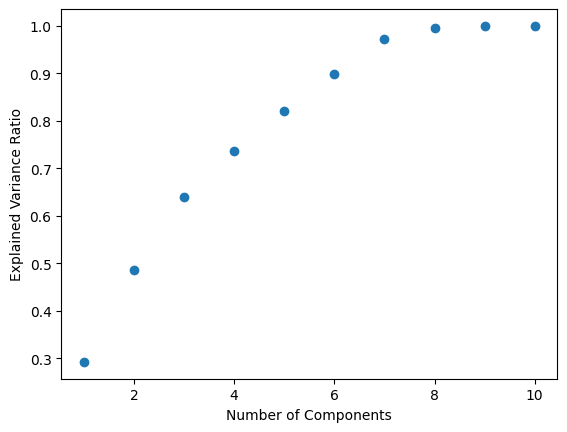

In [ ]:
import matplotlib.pyplot as plt

q_list = range(1,11)
total_evalues = sum([x**2 for x in S_faces])
var_exp_list = []
for q in q_list:
  var_exp = sum([x**2 for x in S_faces[0:q]])/total_evalues
  var_exp_list.append(var_exp)
plt.scatter(q_list,var_exp_list)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')

I would choose 5 components, since it reaches a explained variance ratio of over 80%, which is sufficient to get accurate results for re-construction.

**Task 1.7 (10 points).** Apply t-SNE to the above dataset and visualize the results. You can use existing libraries.

**Task 1.8 (10 points).** Articulate one difference between how the two algorithms (PCA and t-SNE) map the data into low-dimensional space.

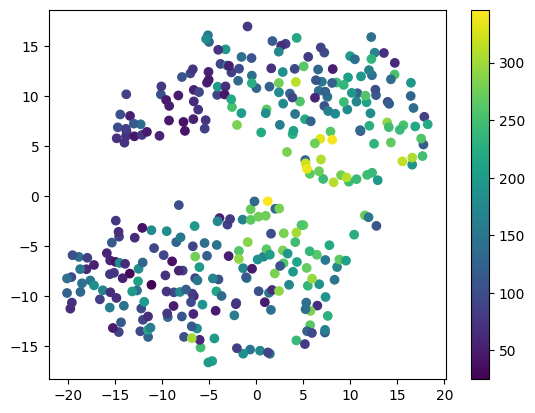

In [ ]:
## Add code here
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_train)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train)
plt.colorbar()

PCA preserves variance in the data by projecting the data to low-dimensional space spanned by the the principal components, preserving global structure of the data. However, t-SNE preserves the similarity relationships between nearby points by using a probability distribution to measure similarities between data points and another distribution in the low-dimensional space to capture the similarities in this reduced space.

**Task 1.9 (20 points).** First, perform KNN classification in the feature space comprised of the first 3 principal components. Then perform KNN classification on the full feature space. Report and compare their accuracy on the test set. For the KNN classifier, you can use your implementation from the past homework or any existing libraries.

**Task 1.10 (10 points).** Plot a comparison in the accuracy, where x-axis denotes the different numbers of principal components and y-axis denotes the the test accuracy with the accuracy of KNN on the full dataset. Additionally, if you used K-means, show the cluster visualization for both methods.

In [ ]:
## Add code here
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

y= np.where(y > np.percentile(y, 50), 1, 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

q=3
X_train_n = normalize(X_train)
X_train_n = np.transpose(X_train_n)
S_train_faces, U_train_faces = train_pca_svd(X_train_n)
top_vectors_train = U_train_faces[:, :q]
X_train_reduced = X_train_n.transpose() @ top_vectors_train

X_test_n = normalize(X_test)
X_test_n = np.transpose(X_test_n)
S_test_faces, U_test_faces = train_pca_svd(X_test_n)
top_vectors_test = U_test_faces[:, :q]
X_test_reduced = X_test_n.transpose() @ top_vectors_test

knn = KNeighborsClassifier()
knn.fit(X_train_reduced, y_train)
y_pred = knn.predict(X_test_reduced)
acc = accuracy_score(y_test,y_pred)
print(f"Accuracy of KNN classification for 3 principal components is {acc}")

knn_full = KNeighborsClassifier()
knn_full.fit(X_train, y_train)
y_pred = knn_full.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print(f"Accuracy of KNN classification for full feature space is {acc}")

Accuracy of KNN classification for 3 principal components is 0.7191011235955056
Accuracy of KNN classification for full feature space is 0.6853932584269663


<ipython-input-11-92bfff6c3960>:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  mean = np.mean(data, axis=1)[:,None]


The accuracy of KNN classification in the feature space comprised of the first 3 principal components is slightly larger than that of KNN classification on the full feature space.

Text(0, 0.5, 'Accuracy')

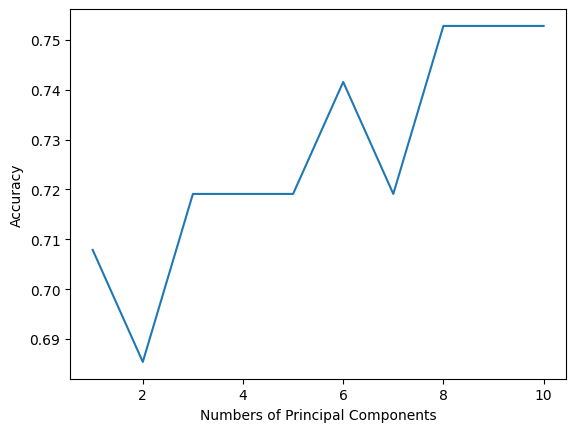

In [ ]:
q_list = range(1,11)
acc_list = []
for q in q_list:
  top_vectors_train = U_train_faces[:, :q]
  X_train_reduced = X_train_n.transpose() @ top_vectors_train
  top_vectors_test = U_test_faces[:, :q]
  X_test_reduced = X_test_n.transpose() @ top_vectors_test

  knn = KNeighborsClassifier()
  knn.fit(X_train_reduced, y_train)
  y_pred = knn.predict(X_test_reduced)
  acc = accuracy_score(y_test,y_pred)
  acc_list.append(acc)

plt.plot(q_list,acc_list)
plt.xlabel('Numbers of Principal Components')
plt.ylabel('Accuracy')